In [17]:
from osgeo import gdal
import geopandas as gpd
import gemgis as gg
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import json
import datetime
import os
os.chdir("D:/Projects/crime-prediction")

In [18]:
census_tracts_path='data/preprocessed/census_tracts_data.geojson'
water_area_path ='data/water_area/water_area.geojson'
city_limits_outline_path = 'data/preprocessed/city_limits_outline.geojson'

In [19]:
def parse_water_area():
   gdf = gpd.read_file(water_area_path)
   estimated_utm_crs = gdf.estimate_utm_crs()
   gdf_projected = gdf.to_crs(estimated_utm_crs)
   return gdf_projected 

In [20]:
water_area_gdf = parse_water_area()

In [21]:
def parse_city_limits_outline():
    gdf = gpd.read_file(city_limits_outline_path)
    estimated_utm_crs = gdf.estimate_utm_crs()
    gdf_projected = gdf.to_crs(estimated_utm_crs)
    return gdf_projected

In [22]:
city_limits_outline_gdf = parse_city_limits_outline()

In [23]:
hex_gdf_projected = gg.vector.create_hexagon_grid(gdf=city_limits_outline_gdf, radius=250, crop_gdf=True)
hex_gdf_projected = hex_gdf_projected.overlay(water_area_gdf, how='difference')
hex_gdf_projected.head()
hex_gdf_projected.reset_index(names=['Grid Id'], inplace=True)

<Axes: >

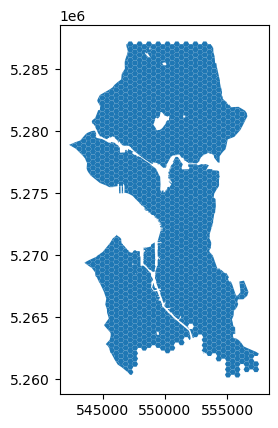

In [24]:
hex_gdf_projected.plot()

In [25]:
hex_gdf = hex_gdf_projected.to_crs("EPSG:4326")
hex_gdf.to_file('data/preprocessed/hex_grid.geojson', driver="GeoJSON")